# Python-Pillow-Tutorial

## 引言

很早之前，Python 有一个图像处理库叫做 Python Imaging Library（简称：PIL），但之后不再维护了，而 Pillow 则接手继续维护，所以，你会发现使用 Pilow 的时候是从 PIL 导入类或函数的。本文是 Pillow 的零基础入门教程，让你轻松学会用 Pillow 处理图像的方法。

## 安装

```bash
pip install Pillow
```

## 教程

### 使用 Image 类

Pillow 中最重要的类就是 [Image](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image) 类。通过这个类，你可以从文件中加载图像，处理图像，或从头创建图像。

使用 [open()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) 函数从文件中加载图像。

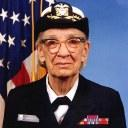

In [1]:
from PIL import  Image
im = Image.open('images/test/hopper.jpg')
im

如果加载成功，会返回一个 [Image](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image) 对象；如果图像无法打开，则会抛出 [OSError](https://docs.python.org/3/library/exceptions.html#OSError) 异常。现在让我们打印类实例的属性来看看图像的信息。

In [2]:
print(f'format: {im.format}')
print(f'size: {im.size}')
print(f'mode: {im.mode}')

format: JPEG
size: (128, 128)
mode: RGB


- [format](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.format): 图像格式。标识图像来源。
- [size](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.size): 图像大小。是一个二元组，包含了图像的宽和高。
- [mode](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.mode): 图像模式。定义了图像中波段的数量和名称，以及像素类型和深度。常用模式有：`l` -> 灰度图像；`RGB` -> 真彩色图像；`CMYK` -> 预印图像。

一旦有了 Image 类的实例，你就可以使用该类定义的方法来操作图像。例如，让我们显示刚才加载的图像。

In [3]:
im.show()

[show()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.show) 方法首先将图像保存到一个临时文件中，然后调用系统默认打开图像的程序来加载这个临时文件。

### 读取和保存图像

Pillow 库支持读取多种图像格式。请使用 [Image](https://pillow.readthedocs.io/en/stable/reference/Image.html#module-PIL.Image) 模块的 [open() ](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open) 函数从磁盘读取文件。读取的时候不必指定图像格式，Pillow 库会根据文件的内容自动确定。

请使用 [Image](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image) 类的 [save()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.save) 方法来保存图像。保存图像时，文件后缀非常重要，因为这个库会根据你指定的文件拓展名来决定使用哪种存储格式。

#### 将其他格式的图像转换为 JPEG 格式

In [4]:
from PIL import  Image
fname = 'images/test/hopper.png'
im_png = Image.open(fname)
im_png.save(f'{fname.split(".")[0]}.jpg')

#### 创建 JPEG 缩略图

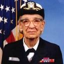

In [5]:
from PIL import  Image
thumbnail_size = (64, 64) # 指定缩略图的大小
fname = 'images/test/hopper.jpg'
im = Image.open(fname)
if thumbnail_size:
    im.thumbnail(thumbnail_size)
else:
    im.thumbnail((im.width//2, im.height//2))
im

### 裁剪、粘贴及合并图像

#### 裁剪图像

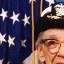

In [6]:
from PIL import  Image
fname = 'images/test/hopper.jpg'
im = Image.open(fname)
box = (0, 0, 64, 64)
region = im.crop(box)
region

Pillow 定义图像左上角坐标为 (0, 0)，[crop()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop) 方法接受一个四元组参数，对应裁剪的坐标 (左, 上, 右, 下)。例如，(0, 0, 64, 64) 表示裁剪矩形左上角的坐标是 (0, 0)，右下角的坐标是 (64, 64)。那么，最终裁剪的子图大小就是 (64-0, 64-0)。

#### 粘贴图像

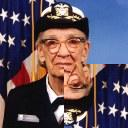

In [7]:
region = region.transpose(Image.Transpose.ROTATE_180) # 将图像旋转180°
box = (64, 64, 128, 128) # 指定粘贴覆盖的区域
im.paste(region, box) # 粘贴图像
im

使用 [paste()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.paste) 方法粘贴图像。贴图的大小必须和给定粘贴区域的大小一致，且不能超出给定底图的区域。

#### 合并图片

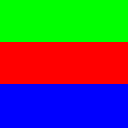

In [8]:
from PIL import  Image
size = (128, 128)
im_1 = Image.new('RGBA', size, (255, 0, 0, 255))
im_2 = Image.new('RGBA', size, (0, 0, 255, 255))
im_3 = Image.new('RGBA', size, (0, 255, 0, 255))
im_3.paste(im_1, (0, size[1]//3))
im_3.paste(im_2, (0, size[1]//3*2))
im_3

#### 划分和合并波段

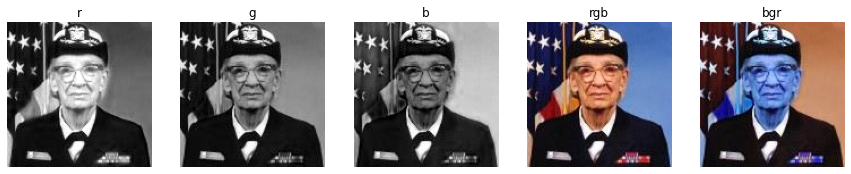

In [9]:
from PIL import  Image
fname = 'images/test/hopper.jpg'
im = Image.open(fname)
r, g, b = im.split()
rgb = Image.merge('RGB', (r, g, b))
bgr = Image.merge('RGB', (b, g, r))


# 绘图
import matplotlib.pyplot as plt
im_list = [r, g, b, rgb, bgr]
plt.figure(figsize=(15, 3))
for i, j in enumerate(im_list):
    plt.subplot(1, 5, i+1)
    plt.title(['r', 'g', 'b', 'rgb', 'bgr'][i])
    plt.axis('off')
    plt.imshow(j, cmap=plt.cm.gray)
plt.show()

[split()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.split) 方法用于划分图像波段。对于单波段图像，返回它本身。

### 几何变换

#### 缩放和旋转图像

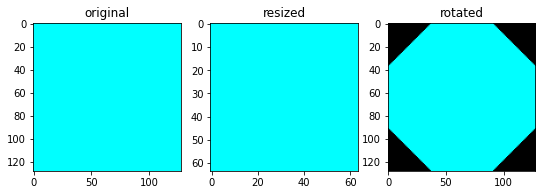

In [10]:
from PIL import  Image
im = Image.new('RGB', (128, 128), 'cyan')
im_resied = im.resize((64, 64))
im_rotated = im.rotate(45)

# 绘图
import matplotlib.pyplot as plt
im_list = [im, im_resied, im_rotated]
plt.figure(figsize=(9, 3))
for i, j in enumerate(im_list):
    plt.subplot(1, 3, i+1)
    plt.title(['original', 'resized', 'rotated'][i])
    # plt.axis('off') # 为了对比 resize 前后图片的大小，我们这里就不隐藏坐标轴了
    plt.imshow(j, cmap=plt.cm.gray)
plt.show()

使用 [resize()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize) 方法缩放图像，该方法接受一个二元组，其含义为图像的宽高；使用 [rotate()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.rotate) 方法旋转图像，接受一个整数，其含义为逆时针旋转的角度。

#### 翻转图像

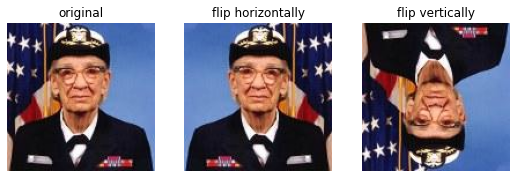

In [11]:
from PIL import  Image
fname = 'images/test/hopper.jpg'
im = Image.open(fname)
im_h_flip = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
im_v_flip = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

# 绘图
import matplotlib.pyplot as plt
im_list = [im, im_h_flip, im_v_flip]
plt.figure(figsize=(9, 3))
for i, j in enumerate(im_list):
    plt.subplot(1, 3, i+1)
    plt.title(['original', 'flip horizontally', 'flip vertically'][i])
    plt.axis('off')
    plt.imshow(j, cmap=plt.cm.gray)
plt.show()

使用 [transpose()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.transpose) 方法可以实现图像的水平翻转和垂直翻转。

### 颜色变换

Pillow 库允许使用 [convert()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert) 方法在不同的像素表示之间转换图像。

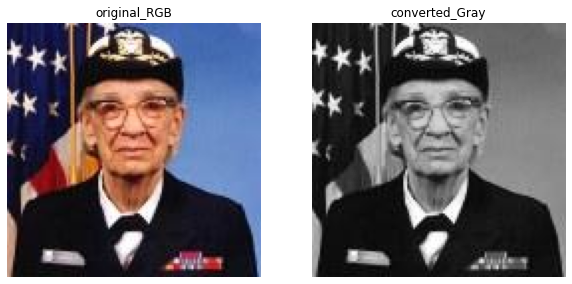

In [12]:
from PIL import  Image
fname = 'images/test/hopper.jpg'
im = Image.open(fname)
im_L = im.convert('L')

# 绘图
import matplotlib.pyplot as plt
im_list = [im, im_L]
plt.figure(figsize=(10, 5))
for i, j in enumerate(im_list):
    plt.subplot(1, 2, i+1)
    plt.title(['original_RGB', 'converted_Gray'][i])
    plt.axis('off')
    plt.imshow(j, cmap=plt.cm.gray)
plt.show()

该库支持每个格式与 `L` 和 `RGB` 的相互转换，但如何和其他格式进行转换，一般采用 RGB 做中间媒介。

### 图像增强

Pillow 库提供了大量的的用于图像增强的方法和模块。

[ImageFilter](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html) 模块中封装了很多用于图像滤波的类，包括高斯模糊，边缘增强，细节滤波等等。

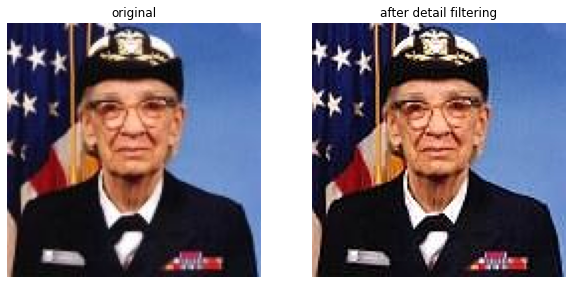

In [13]:
from PIL import  ImageFilter
fname = 'images/test/hopper.jpg'
im = Image.open(fname)
im_out = im.filter(ImageFilter.DETAIL) # 细节滤波，使图像中的细节更加明显

# 绘图
import matplotlib.pyplot as plt
im_list = [im, im_out]
plt.figure(figsize=(10, 5))
for i, j in enumerate(im_list):
    plt.subplot(1, 2, i+1)
    plt.title(['original', 'after detail filtering'][i])
    plt.axis('off')
    plt.imshow(j)
plt.show()

#### 像素点操作

[point()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.point) 方法用于批量转换图像像素点。该方法接受一个 lambda 函数作为参数，图像中所有像素点都根据该函数进行处理。例如，下方这个例子就是通过 point() 方法对图像的对比度进行增强。

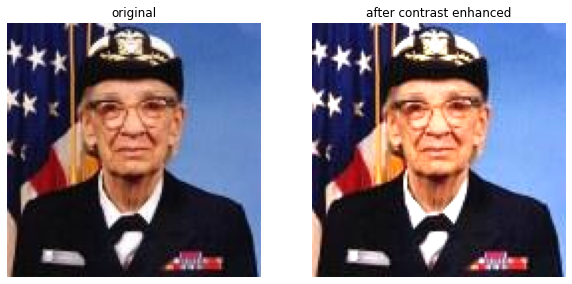

In [14]:
from PIL import  Image
fname = 'images/test/hopper.jpg'
im = Image.open(fname)
im_out = im.point(lambda _: _*1.25)

# 绘图
import matplotlib.pyplot as plt
im_list = [im, im_out]
plt.figure(figsize=(10, 5))
for i, j in enumerate(im_list):
    plt.subplot(1, 2, i+1)
    plt.title(['original', 'after contrast enhanced'][i])
    plt.axis('off')
    plt.imshow(j)
plt.show()

#### 高级图像增强

要想获得更高级的图像增强，你可以使用 [ImageEnhance](https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html#module-PIL.ImageEnhance) 模块中定义的类。通过那些类，你可以快速地对图像的亮度、对比度、色彩平衡以及锐化程度进行调节。

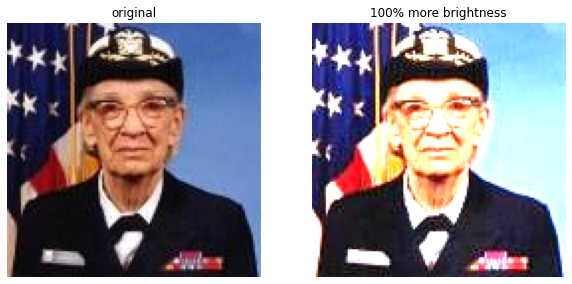

In [15]:
from PIL import Image, ImageEnhance
fname = 'images/test/hopper.jpg'
im = Image.open(fname)
enh = ImageEnhance.Brightness(im).enhance(2)

# 绘图
import matplotlib.pyplot as plt
im_list = [im, enh]
plt.figure(figsize=(10, 5))
for i, j in enumerate(im_list):
    plt.subplot(1, 2, i+1)
    plt.title(['original', '100% more brightness'][i])
    plt.axis('off')
    plt.imshow(j)
plt.show()

### 图像序列

Pillow 库也包含对图像序列（动画格式）的一些基本支持。支持的序列格式文件包括：GIF、TIFF和FLI等等。

#### 读取序列

当加载序列图像时，默认加载的是第一帧。你可以使用 [seek()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.seek) 和 [tell()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.tell) 方法访问不同的帧。

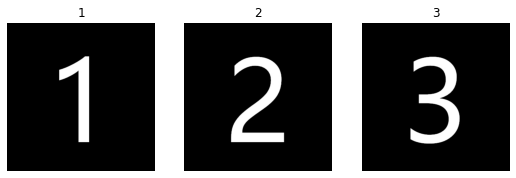

In [16]:
from PIL import Image
fname = 'images/test/digit.gif'
im = Image.open(fname)
im_list = [im.copy()]
try:
    while True:
        im.seek(im.tell()+1)
        im_list.append(im.copy())
except EOFError:
    pass

# 绘图 
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
for i, j in enumerate(im_list):
    plt.subplot(1, 3, i+1)
    plt.title(str(i+1))
    plt.axis('off')
    plt.imshow(j)
plt.show()

#### 迭代序列

除使用 [seek()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.seek) 方法读取图像序列外，[ImageSequence](https://pillow.readthedocs.io/en/stable/reference/ImageSequence.html) 模块还提供了 for 循环迭代遍历图像序列的方法。

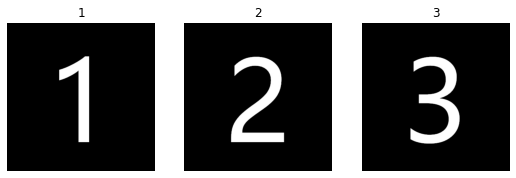

In [17]:
from PIL import Image, ImageSequence
fname = 'images/test/digit.gif'
im = Image.open(fname)
im_list = []
for frame in ImageSequence.Iterator(im):
    im_list.append(frame.copy())

# 绘图 
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
for i, j in enumerate(im_list):
    plt.subplot(1, 3, i+1)
    plt.title(str(i+1))
    plt.axis('off')
    plt.imshow(j)
plt.show()

此外，你也可以通过 Image 模块定义的属性 [n_frames](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.n_frames) 来控制 for 循环的次数。

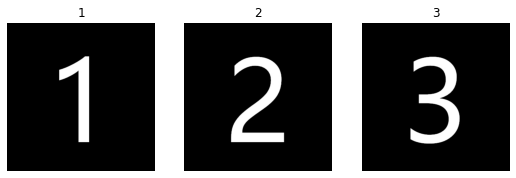

In [18]:
from PIL import Image
fname = 'images/test/digit.gif'
im = Image.open(fname)
im_list = []
for i in range(im.n_frames):
    im.seek(i)
    im_list.append(im.copy())

# 绘图 
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
for i, j in enumerate(im_list):
    plt.subplot(1, 3, i+1)
    plt.title(str(i+1))
    plt.axis('off')
    plt.imshow(j)
plt.show()

### PostScript 打印

In [19]:
from PIL import Image, PSDraw
with Image.open("images/test/hopper.jpg") as im:
    with open('images/test/hopper.ps', 'wb') as fp:
        # 创建文档
        ps = PSDraw.PSDraw(fp)

        # 开始文档
        ps.begin_document("hopper")

        # 插入图片
        ps.image(box, im, 75)
        ps.rectangle((1 * 72, 2 * 72, 7 * 72, 10 * 72))

        # 插入标题
        ps.setfont("HelveticaNarrow-Bold", 36)
        ps.text((3 * 72, 4 * 72), "hopper")

        # 结束文档
        ps.end_document()

### 更多读取图片的方式

我们通常使用 Image.open(filename) 的方式来打开一张图片。其实，Image.open() 还可以作为上下文管理器。如果一切顺利，返回一个 [PIL.Image.Image](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image) 对象，否则抛出 [OSError](https://docs.python.org/3/library/exceptions.html#OSError) 异常。

In [20]:
from PIL import Image
with Image.open('images/test/hopper.jpg') as im:
    im.show()

#### 从打开的文件中读取

In [21]:
from PIL import  Image
with open('images/test/hopper.jpg', 'rb') as fp:
    im = Image.open(fp)
    im.show()

#### 从 tar 存档中读取

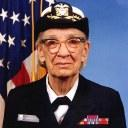

In [22]:
from PIL import Image, TarIO
fp = TarIO.TarIO('images/test/hopper.tar', "hopper.jpg")
im = Image.open(fp)
im

#### 批量处理

例如，将所有 PNG 格式的图片都转换成低质量的 JPEG 格式保存在工作目录中。

In [23]:
import glob
from PIL import Image


def compress_image(source_path, dest_path):
    with Image.open(source_path) as img:
        if img.mode != "RGB":
            img = img.convert("RGB")
        img.save(dest_path, "JPEG", optimize=True, quality=80)

if __name__=='__main__':
    for path in glob.glob("*.png"):
        compress_image(path, path[:-4] + ".jpg")

### 控制解码器

[draft()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.draft) 方法允许操作一个打开但尚未加载的图像，使其尽可能与给定模式和大小匹配，这是通过重新配置图像解码器来实现的。但仅适用于 JPEG 和 MPO 文件。

In [24]:
from PIL import Image
fname = 'images/test/hopper.jpg'
with Image.open(fname) as im:
    print("original =", im.mode, im.size)

    im.draft("L", (64, 64))
    print("draft =", im.mode, im.size)

    im.show()

original = RGB (128, 128)
draft = L (64, 64)


## 概念

### 波段

一幅图像可能由一个或多个波段组成，只要它们具有相同的尺寸和深度。例如，PNG 图像可能有 R、G、B 和 A 四个波段，分别表示红色、绿色、蓝色和 alpha 透明值。

('R', 'G', 'B')
[24, 18, 16, 22, 25, 23, 19, 17, 28, 29]


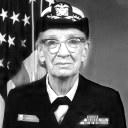

In [25]:
from PIL import  Image
im = Image.open('images/test/hopper.jpg')
print(im.getbands())
print(list(im.getdata(0))[:10]) # 数据太多，这里只展示前10个像素点的值
r, g, b = im.split()
r = im.getchannel('R')
r

- [Image.getbands()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.getbands)：获取图像中所有波段的名称，并以元组的形式返回。
- [Image.getdata(band=None)](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.getdata)：将此图像的内容作为包含像素值的序列对象返回。序列对象是扁平的，即第一行的值紧跟在第0行之后，依此类推。`band` 参数表示波段的索引，默认是 `None`，返回所有波段。
- [Image.split()](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.split)：将图像分割为单独的波段。
- [Image.getchannel(channel)](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.getchannel)：返回图像的单个通道。`channel` 参数可接受一个整型的索引值，或大写的通道名称。

### 模式

图像模式 [mode](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes) 是一个字符串，它定义图像中像素的类型和深度。每个像素使用位深度的全部范围，例如：1位像素的范围是0-1，8位像素的范围是0-255，以此类推。当前 Pillow 支持以下标准模式：
- `1`：1位，黑白，每字节存储1个像素
- `L`：8位，黑白
- `P`：8位，使用调色板映射到任何其他模式
- `RGB`：3x8位，真彩色
- `RGBA`：4x8位，带透明遮罩的真彩色
- `CMYK`：4x8位，印刷色彩（cyan，magenta，yellow，black）
- ……

你可以通过 [mode](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.mode) 属性读取图像的模式。这是一个包含上述值之一的字符串。

In [26]:
from PIL import  Image
im = Image.open('images/test/hopper.jpg')
print(im.mode)
r = im.getchannel('R')
print(r.mode)

RGB
L


### 大小

你可以通过 [size](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.size) 属性读取图像大小。这是一个二元组，包含以像素位单位的水平和垂直大小，即图像的宽和高。

In [27]:
from PIL import  Image
im = Image.open('images/test/hopper.jpg')
im.size

(128, 128)

### 坐标系

Pillow 使用笛卡尔坐标系，左上角坐标为 (0, 0)。坐标通常作为2元组传递给类或函数。矩形表示为4元组，前两个元素是左上角点的坐标，后两个元素代表右下角点的坐标。

### 调色板

调色板模式（p）使用调色板为每个像素定义实际颜色。

### 滤波器

对于可能将多个输入像素映射到单个输出像素的几何操作，Pillow 提供了多种不同的重采样滤波器。

- PIL.Image.NEAREST：最邻近采样
- PIL.Image.BILINEAR：双线性插值
- PIL.Image.HAMMING：汉明采样
- PIL.Image.BICUBIC：双三插值
- PIL.Image.LANCZOS：余弦滤波

## 参考
> [Pillow 官方文档](https://pillow.readthedocs.io/en/stable/index.html)